In [2]:
NAME = "Fahad Nadim Ziad"
ID = "24341216"
COLLABORATORS_ID = ""

# Necessary library import

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, img_as_float, color, util, filters, exposure, transform, feature, measure, morphology, restoration
from scipy import ndimage, signal

# Task 1 - Basic Image Operation

import your image or any photo taken by you (`sample.jpeg`) as a numpy array, save it in the varaible `I`.

A picture taken from your phone of any scenary/streets/building is better.

remember your image name MUST be `sample.jpeg`.

Make sure the height and the width of the image is **smaller than 1000 pixels**.

In [4]:
I = io.imread("/Users/viruzxero/BRACU/CS_ELEC/CSE428/LAB/Assignment_1/sample.jpg") # Replace None with appropriate function call line


# find the height and the width of the image
H, W = I.shape[:2]  # should contain height and width
print("Height is", H)
print("Width is", W)

### BEGIN SOLUTION
max_dim = 1000
if H > max_dim or W > max_dim:
    scale = max_dim / max(H, W)  # Calculate the scaling factor
    new_H, new_W = int(H * scale), int(W * scale)  # Compute new dimensions
    I_resized = transform.resize(I, (new_H, new_W), anti_aliasing=True)  # Resize the image
    print("Resized Height is", new_H)
    print("Resized Width is", new_W)
else:
    I_resized = I  # No resizing needed
    print("Image dimensions are already below 1000 pixels.")
### END SOLUTION

Height is 4284
Width is 5712
Resized Height is 750
Resized Width is 999


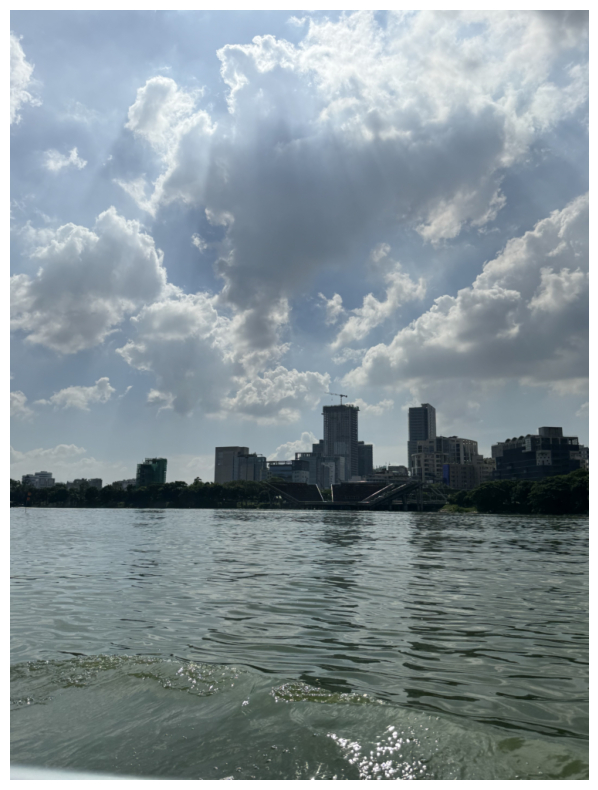

Image shape:  (999, 750, 3)


/var/folders/dy/ks2v39t11q13p_k8zwh7bqj80000gn/T/ipykernel_11374/3594902520.py:39: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I)


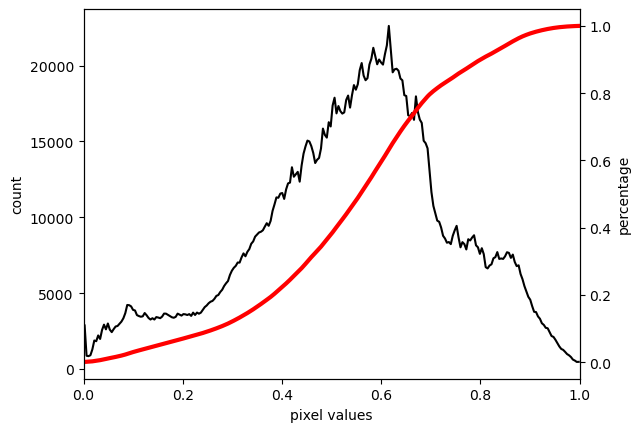

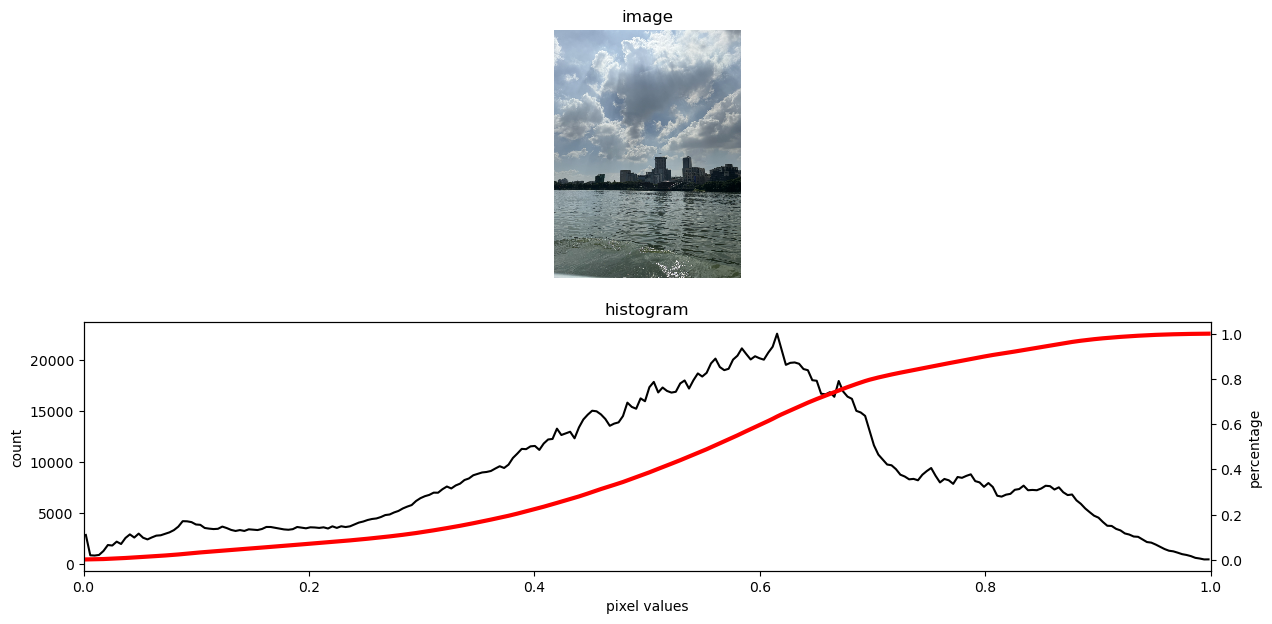

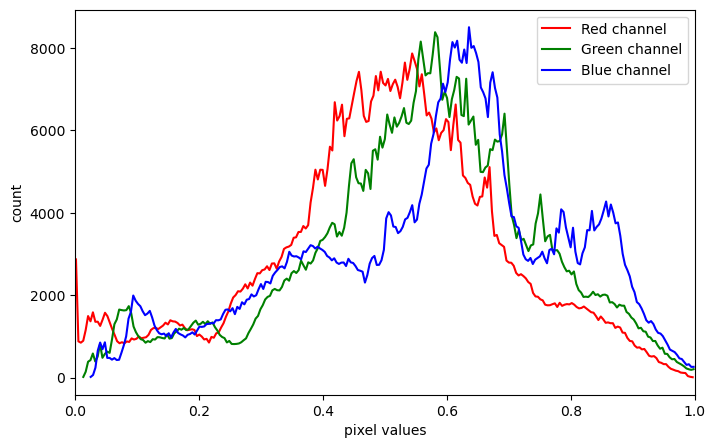

In [5]:
# Normalize the image so that the gray scales are between 0 and 1. Save it to I and display the image
I_resized = np.rot90(I_resized, k=-1)
I = img_as_float(I_resized)  # should contain the normalized image


### BEGIN SOLUTION
def plot_image(img,figsize=(10,10)):
    plt.figure(figsize=figsize)
    if len(img.shape)==2:
        plt.imshow(img, cmap="gray")
    else:
        plt.imshow(img)
    plt.axis("off")
    plt.show()
    print("Image shape: ", img.shape)
    
    
def plot_hist(I, nbins=256, normalize=False, plot_cdf=True):
    hist, bins_hist = exposure.histogram(I.ravel(), nbins=nbins, normalize=normalize)
    plt.plot(bins_hist, hist, 'k')
    plt.xlabel("pixel values")
    if normalize:
        plt.ylabel("probability")
    else:
        plt.ylabel("count")
    xmax = 1 if I.max() <= 1 else 255
    plt.xlim([0, xmax])

    if plot_cdf:
        cdf, bins_cdf = exposure.cumulative_distribution(I.ravel(), nbins=nbins)
        plt.twinx()
        plt.plot(bins_cdf, cdf, 'r', lw=3)
        plt.ylabel("percentage")

        
def plot_img_and_hist(I, nbins=256, normalize=False, plot_cdf=True, figsize=(12, 6)):
    fig, ax = plt.subplots(2, 1, figsize=figsize)
    plt.subplot(2, 1, 1)
    io.imshow(I)
    plt.axis("off")
    plt.title("image")

    plt.subplot(2, 1, 2)
    plot_hist(I, nbins=nbins, normalize=normalize, plot_cdf=plot_cdf)
    plt.title("histogram")
    
def plot_hist_color(I, nbins=256, normalize=False):
    color=['r', 'g', 'b']
    plt.figure(figsize=(8,5))
    for i in range(3):
        hist, bins_hist = exposure.histogram(I[:, :, i].ravel(), nbins=nbins, normalize=normalize)
        plt.plot(bins_hist, hist, color[i])

    plt.xlabel("pixel values")
    if normalize:
        plt.ylabel("probability")
    else:
        plt.ylabel("count")
    xmax = 1 if I.max() <= 1 else 255
    plt.xlim([0, xmax])
    plt.legend(['Red channel', 'Green channel', 'Blue channel'])

plot_image(I)
plot_hist(I)
plot_img_and_hist(I)
plot_hist_color(I)
### END SOLUTION

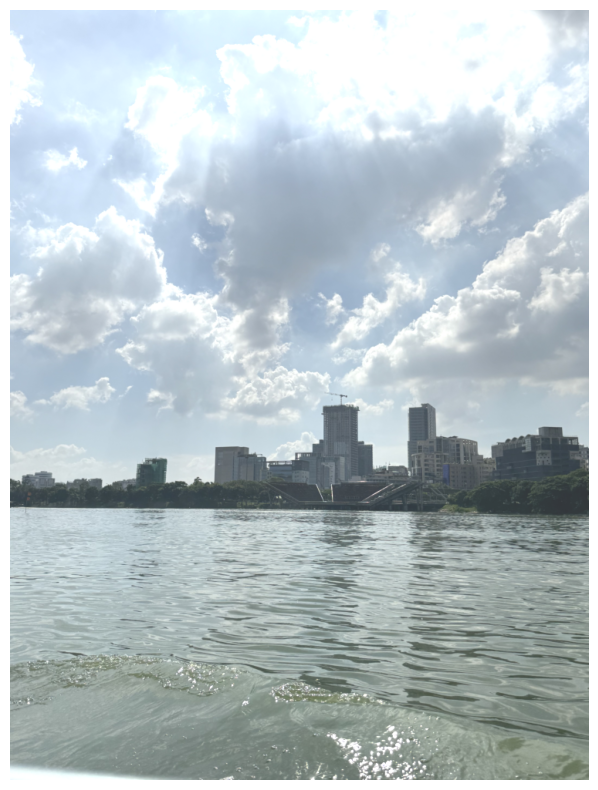

Image shape:  (999, 750, 3)


/var/folders/dy/ks2v39t11q13p_k8zwh7bqj80000gn/T/ipykernel_11374/3594902520.py:39: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I)


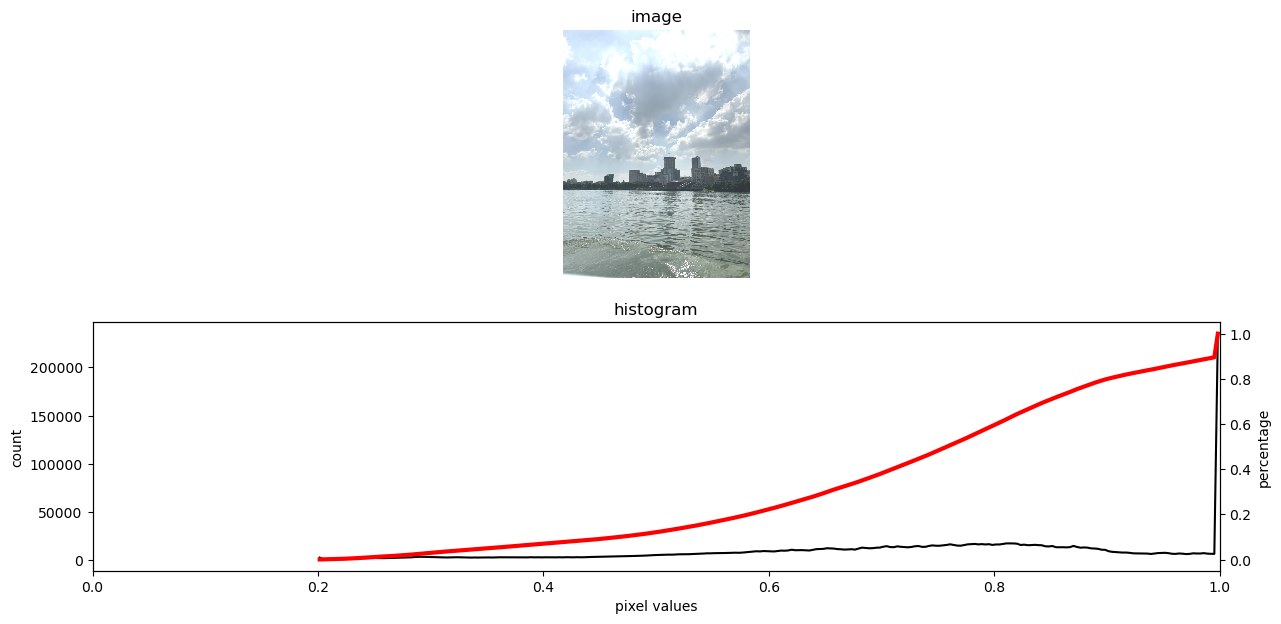

In [6]:
# Increase the brightness of the image without changing the contrast.
# Save the resulting image in I_bright and display it.
brightness_factor = 0.2  # Adjust this value to control brightness (e.g., 0.2 increases brightness)
I_bright = np.clip(I + brightness_factor, 0, 1)  # Add brightness and clip values to [0, 1]

### BEGIN SOLUTION
plot_image(I_bright)
plot_img_and_hist(I_bright)
### END SOLUTION

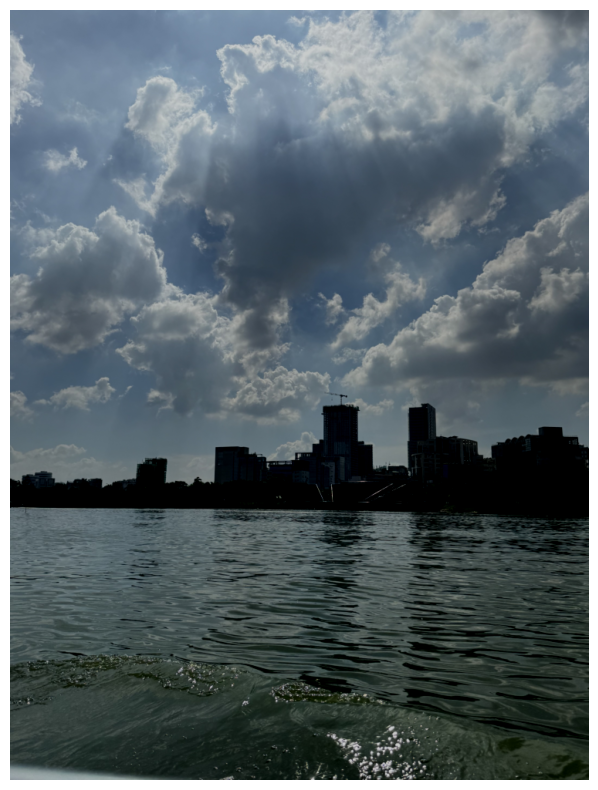

Image shape:  (999, 750, 3)


/var/folders/dy/ks2v39t11q13p_k8zwh7bqj80000gn/T/ipykernel_11374/3594902520.py:39: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I)


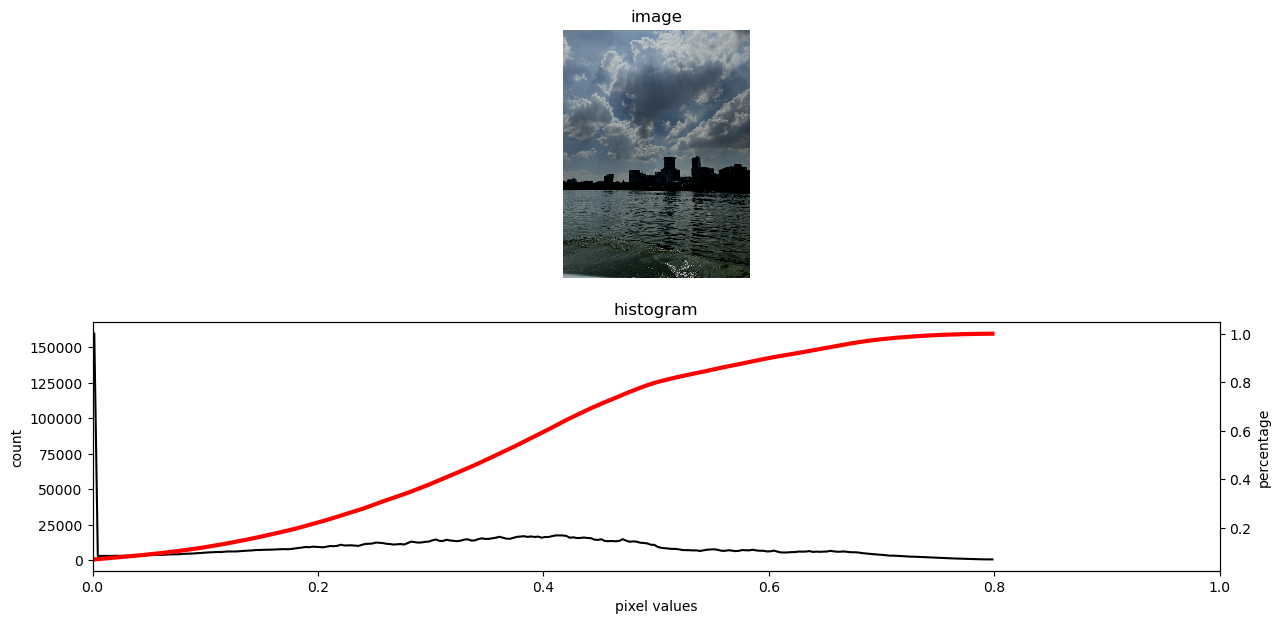

In [7]:
# Decrease the brightness of the image without changing the contrast.
# Save the resulting image in I_dark and display it.

I_dark = np.clip(I - brightness_factor, 0, 1) 

### BEGIN SOLUTION
plot_image(I_dark)
plot_img_and_hist(I_dark)
### END SOLUTION

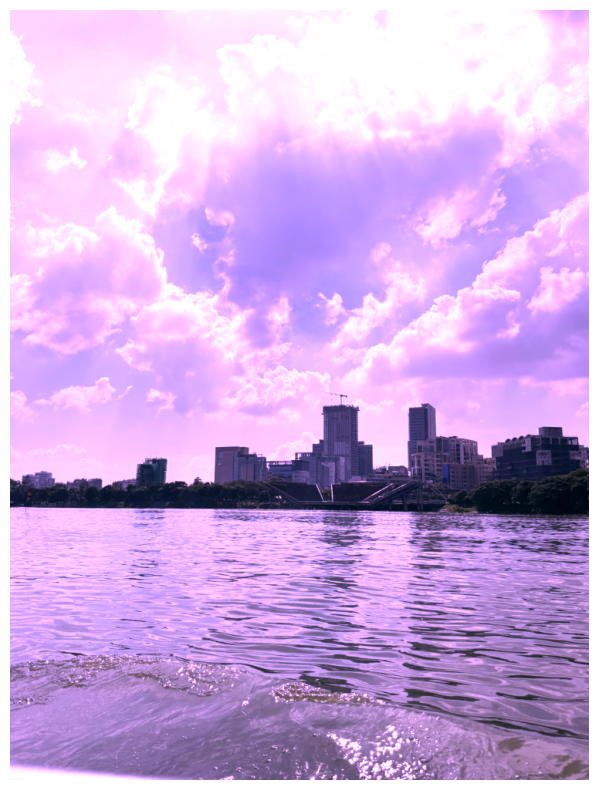

Image shape:  (999, 750, 3)


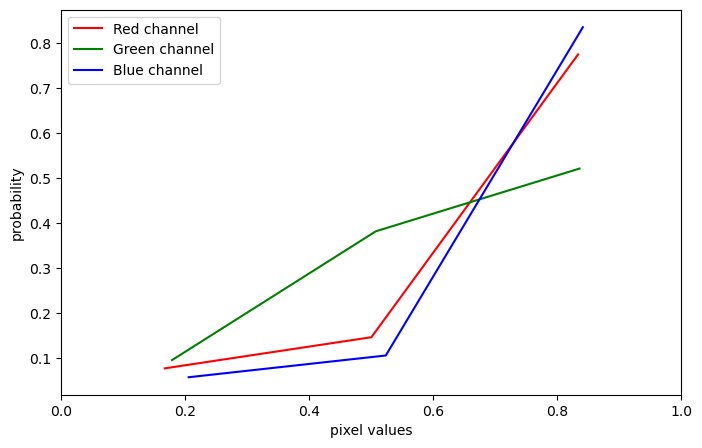

In [8]:
# Multiply the three channels of image I with three DIFFERENT numbers between 0.3 and 3
# Save the resulting image in I_tint and display it.
# The resulting image should have some color shift

### BEGIN SOLUTION
red_scale = 1.75   # Scaling factor for the Red channel
green_scale = 1.2  # Scaling factor for the Green channel
blue_scale = 1.95  # Scaling factor for the Blue channel

# Create an empty array for the tinted image
I_tint = np.zeros(I.shape, dtype=I.dtype)

# Apply scaling factors to each channel
I_tint[:, :, 0] = I[:, :, 0] * red_scale  # Apply red scale
I_tint[:, :, 1] = I[:, :, 1] * green_scale  # Apply green scale
I_tint[:, :, 2] = I[:, :, 2] * blue_scale  # Apply blue scale

# Clip the values to ensure they are in the range [0, 1]
I_tint = np.clip(I_tint, 0, 1)

# Display the tinted image
plot_image(I_tint)

# Plot the histogram for the three channels
plot_hist_color(I_tint, nbins=3, normalize=True)
plt.show()
### END SOLUTION

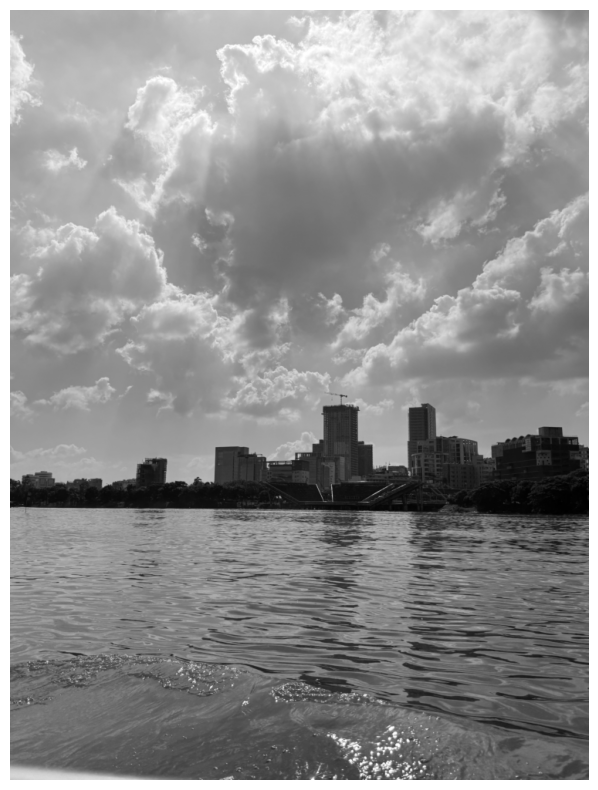

Image shape:  (999, 750)


/var/folders/dy/ks2v39t11q13p_k8zwh7bqj80000gn/T/ipykernel_11374/3594902520.py:39: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I)


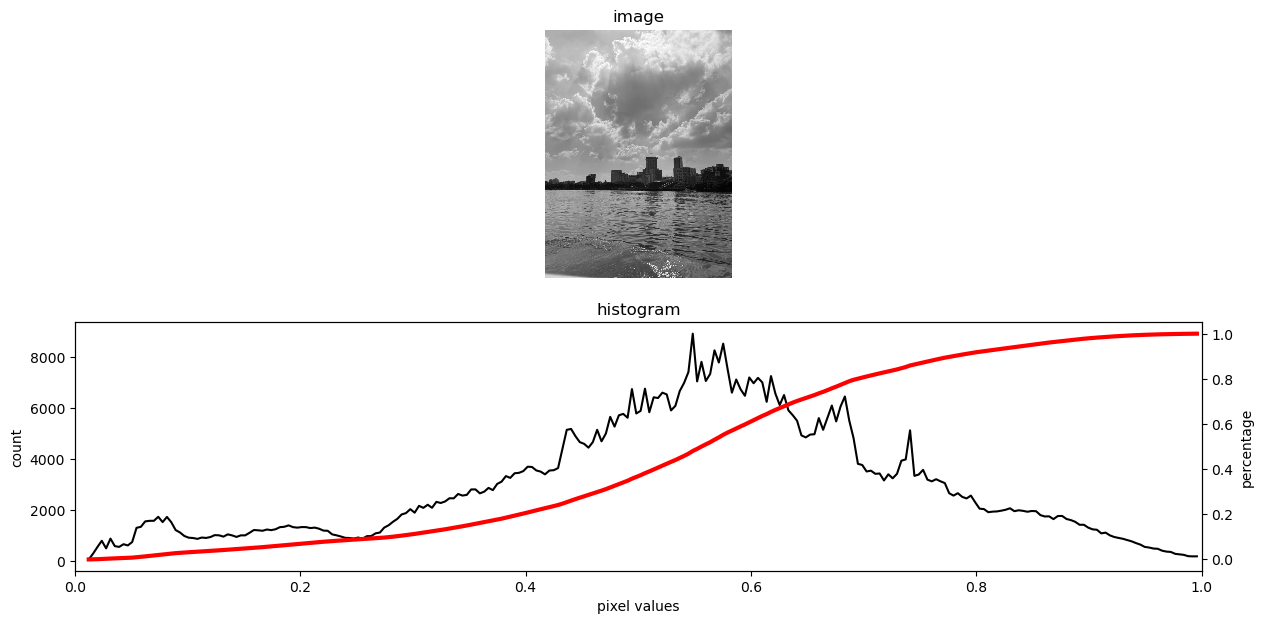

In [9]:
# Convert the image into a grayscale image.
# Save it to I_gray and display it
I_gray = color.rgb2gray(I)  # Converted to grayscale

### BEGIN SOLUTION
plot_image(I_gray)
plot_img_and_hist(I_gray)
### END SOLUTION

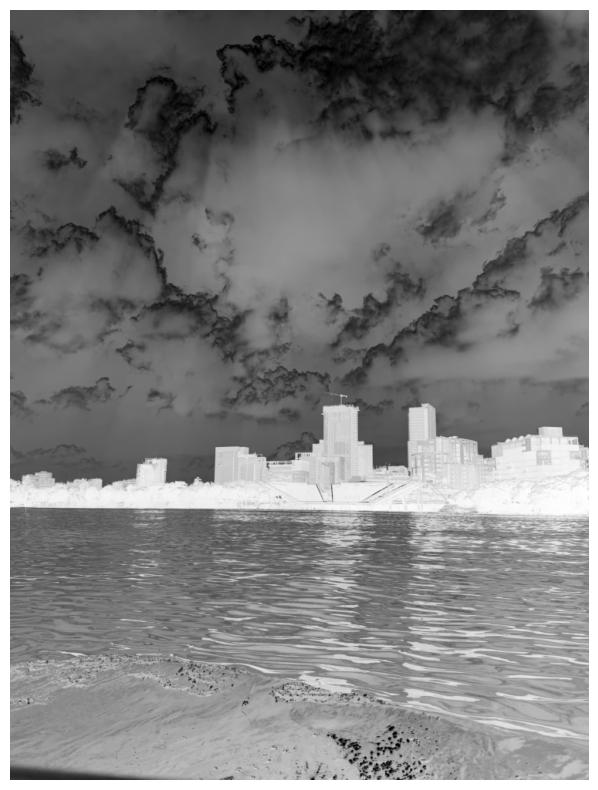

Image shape:  (999, 750)


/var/folders/dy/ks2v39t11q13p_k8zwh7bqj80000gn/T/ipykernel_11374/3594902520.py:39: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I)


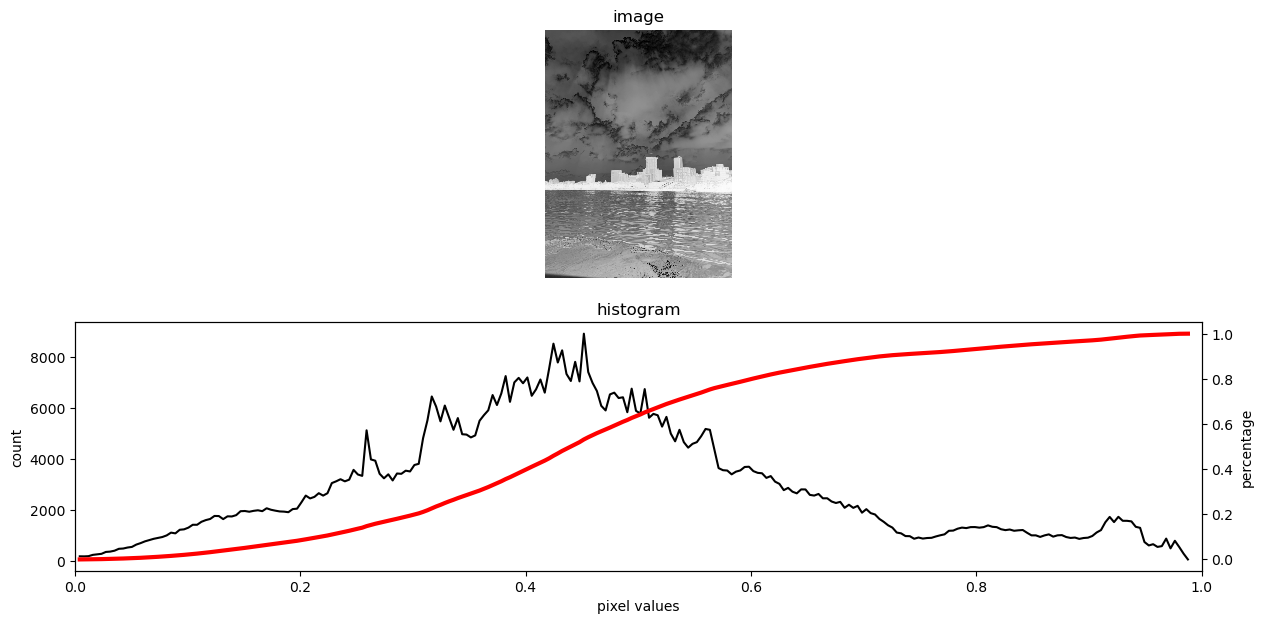

In [10]:
# Display the negative of the grayscale image

### BEGIN SOLUTION
I_neg = 1 - I_gray  # Invert the grayscale image
plot_image(I_neg)
plot_img_and_hist(I_neg)
### END SOLUTION

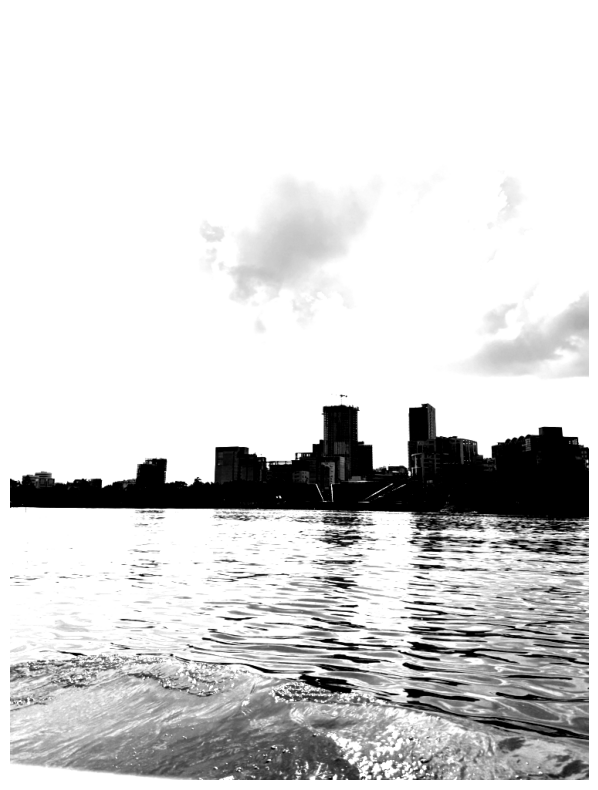

Image shape:  (999, 750)


/var/folders/dy/ks2v39t11q13p_k8zwh7bqj80000gn/T/ipykernel_11374/3594902520.py:39: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I)


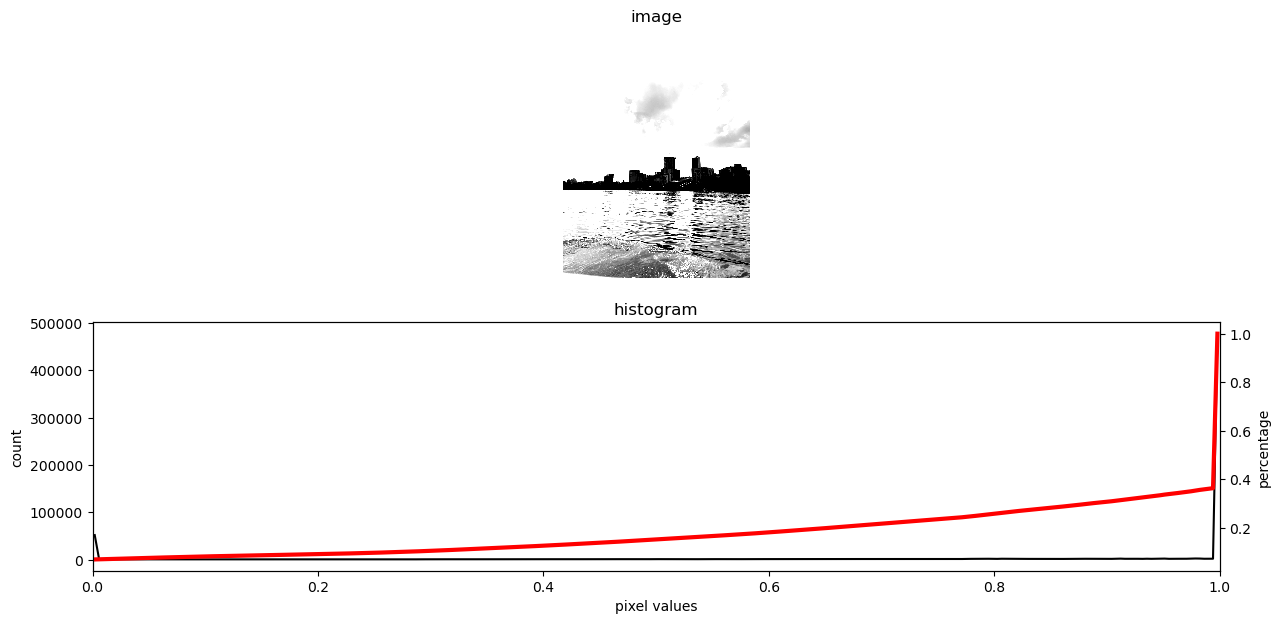

In [11]:
# Artificially degrade the **grayscale image** by reducing it contrast
# You can do so by recaling the gray values and concentrating them in a narrow range,
# say between 0.4 and 0.7.
# Save the image as I_degraded and display it
# HINT: SEE lab-3-codes

I_degraded = I_gray.copy()  # Created a copy of the grayscale image
I_degraded = np.clip((I_degraded - 0.2) / (0.7 - 0.4), 0, 1)  # Rescale to [0, 1]
### BEGIN SOLUTION
plot_image(I_degraded)
plot_img_and_hist(I_degraded)
### END SOLUTION

In [12]:
# Complete the following function to perform Piecewise Linear Contrast stretching
# That is, implement the map shown in Slide 17 of Lecture 3

# Prototype: piecewise_contrast_stretch(I_gray, r1, r2, s1, s2)
# Assuming both input and output images are normalized between 0 and 1


def piecewise_contrast_stretch(I, r1, r2, s1, s2):
    """
    Perform Piecewise Linear Contrast Stretching on a grayscale image.

    Parameters:
    - I: Input grayscale image (normalized between 0 and 1)
    - r1, r2: Control points on the input intensity range
    - s1, s2: Control points on the output intensity range

    Returns:
    - I_stretched: Contrast-stretched image
    """
    # Initialize the output image
    I_stretched = np.zeros_like(I)

    # First segment: x < r1
    mask1 = I < r1
    I_stretched[mask1] = (s1 / r1) * I[mask1]

    # Second segment: r1 <= x <= r2
    mask2 = (I >= r1) & (I <= r2)
    I_stretched[mask2] = s1 + ((s2 - s1) / (r2 - r1)) * (I[mask2] - r1)

    # Third segment: x > r2
    mask3 = I > r2
    I_stretched[mask3] = s2 + ((1 - s2) / (1 - r2)) * (I[mask3] - r2)

    return I_stretched


    ### BEGIN SOLUTION

    ### END SOLUTION



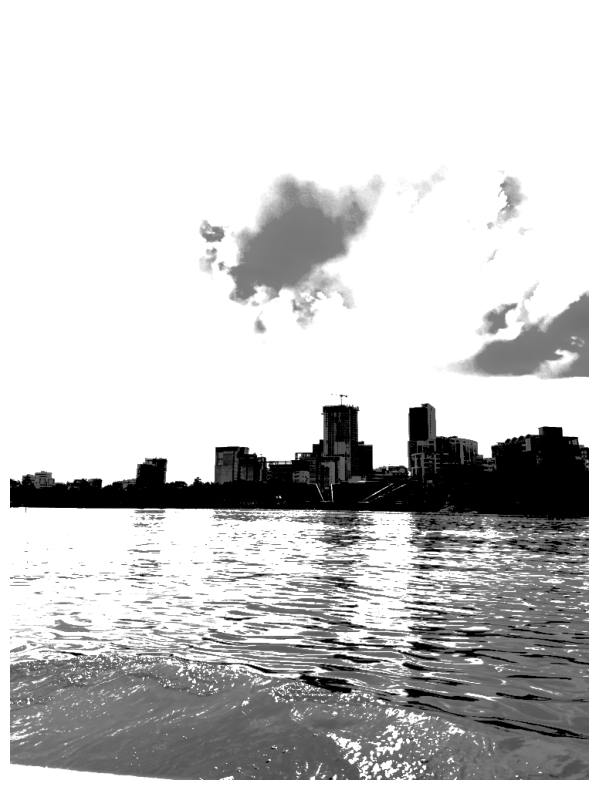

Image shape:  (999, 750)


/var/folders/dy/ks2v39t11q13p_k8zwh7bqj80000gn/T/ipykernel_11374/3594902520.py:39: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I)


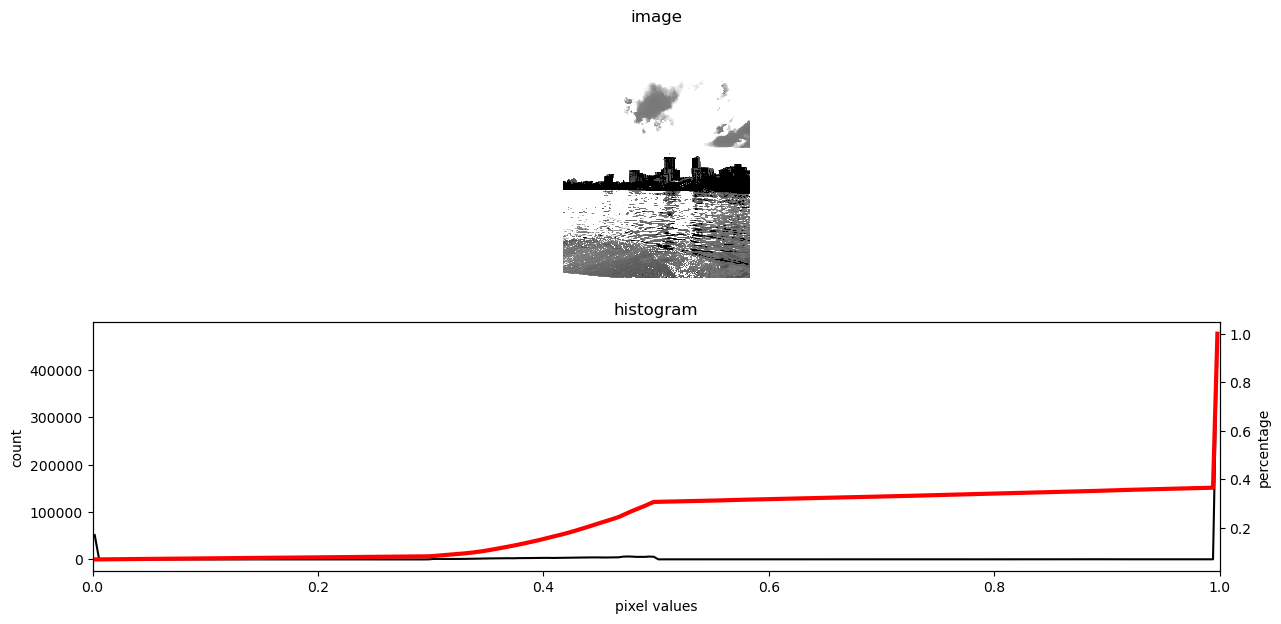

In [13]:
# To test your implementation, contrast strech the degraded image I_degrade
r1 = 0.1
r2 = 0.9
s1 = 0.3
s2 = 0.5
I_stretched = piecewise_contrast_stretch(I_degraded, r1, r2, s1, s2)

# Display the strtched image

### BEGIN SOLUTION
plot_image(I_stretched)
plot_img_and_hist(I_stretched)
### END SOLUTION

# Task 2 - Histogram and Equalization

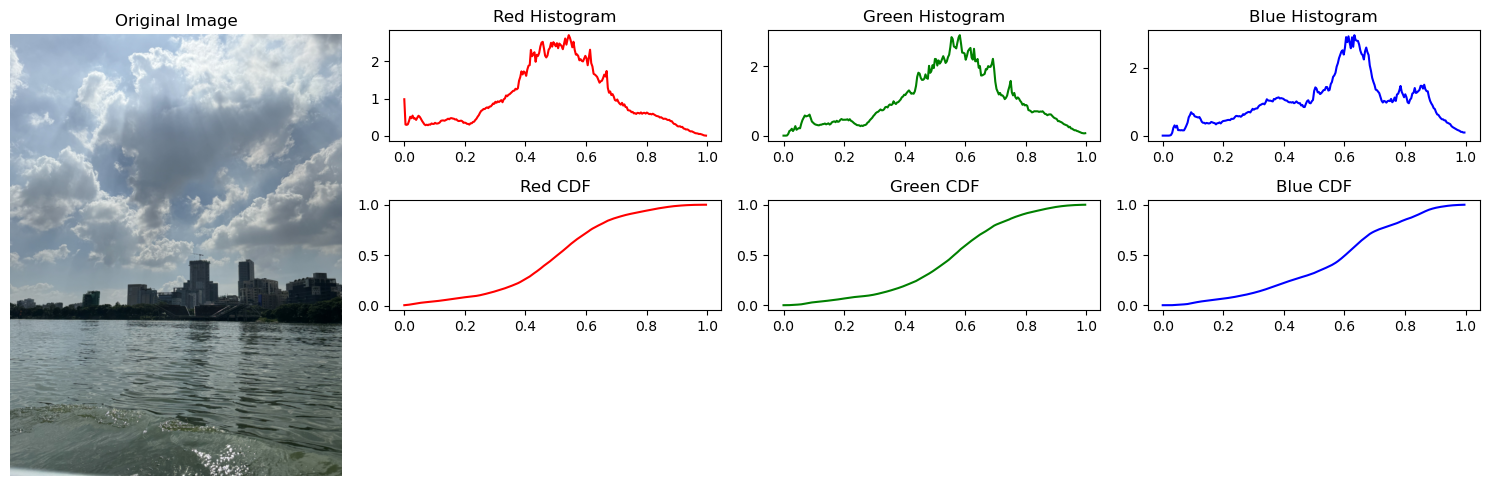

In [14]:
# Plot the Image and its histogram + cdf of the original image I
# Note that it is a color image, so it will have three different histograms

### BEGIN SOLUTION

def plot_image_histogram_cdf(image):
    # Ensure the image is normalized between 0 and 1
    image = img_as_float(image)
    
    # Split the image into R, G, B channels
    R, G, B = image[:, :, 0], image[:, :, 1], image[:, :, 2]
    
    # Compute histograms and CDFs for each channel
    channels = {'Red': R, 'Green': G, 'Blue': B}
    histograms = {}
    cdfs = {}
    
    for color, channel in channels.items():
        hist, bin_edges = np.histogram(channel, bins=256, range=(0, 1), density=True)
        cdf = np.cumsum(hist) * (bin_edges[1] - bin_edges[0])  # Normalize CDF
        histograms[color] = (hist, bin_edges)
        cdfs[color] = cdf
    
    # Plot the image
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 4, 1)
    plt.imshow(image)
    plt.title("Original Image")
    plt.axis("off")
    
    # Plot histograms and CDFs
    for i, (color, channel) in enumerate(channels.items(), start=2):
        hist, bin_edges = histograms[color]
        cdf = cdfs[color]
        
        plt.subplot(3, 4, i)
        plt.plot(bin_edges[:-1], hist, color=color.lower())
        plt.title(f"{color} Histogram")
        
        plt.subplot(3, 4, i + 4)
        plt.plot(bin_edges[:-1], cdf, color=color.lower())
        plt.title(f"{color} CDF")
    
    plt.tight_layout()
    plt.show()

# Call the function with the original image I
plot_image_histogram_cdf(I)

### END SOLUTION

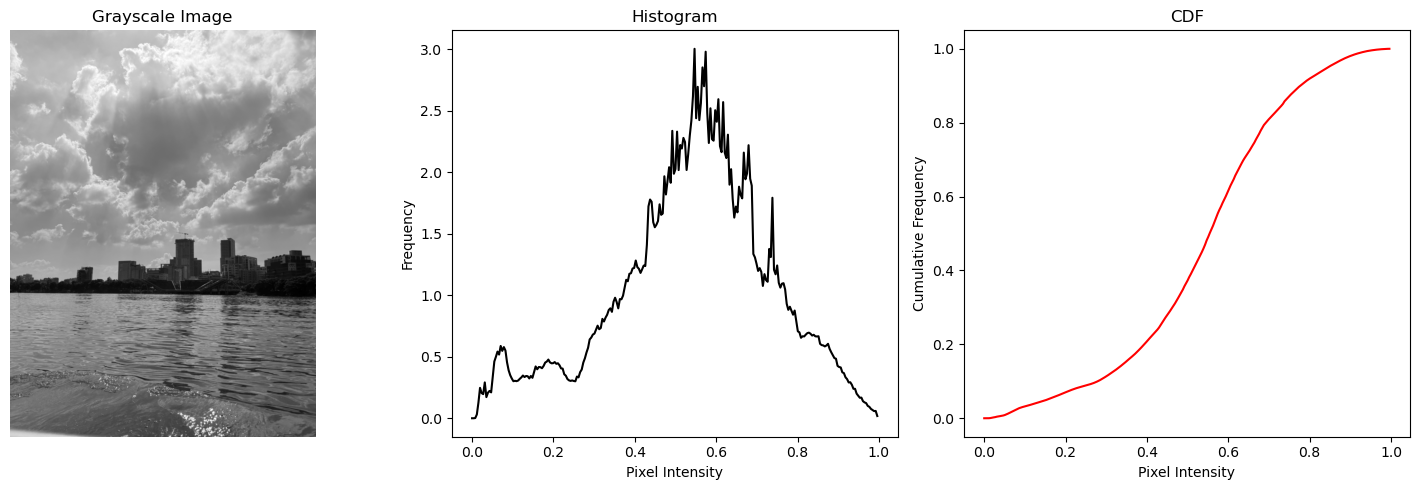

In [15]:
# Plot the Image and its histogram + cdf of the grayscale image I_gray

### BEGIN SOLUTION

def plot_grayscale_histogram_cdf(image):
    # Ensure the image is normalized between 0 and 1
    image = img_as_float(image)
    
    # Compute histogram and CDF
    hist, bin_edges = np.histogram(image, bins=256, range=(0, 1), density=True)
    cdf = np.cumsum(hist) * (bin_edges[1] - bin_edges[0])  # Normalize CDF
    
    # Plot the grayscale image
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title("Grayscale Image")
    plt.axis("off")
    
    # Plot the histogram
    plt.subplot(1, 3, 2)
    plt.plot(bin_edges[:-1], hist, color='black')
    plt.title("Histogram")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    
    # Plot the CDF
    plt.subplot(1, 3, 3)
    plt.plot(bin_edges[:-1], cdf, color='red')
    plt.title("CDF")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Cumulative Frequency")
    
    plt.tight_layout()
    plt.show()

# Call the function with the grayscale image I_gray
plot_grayscale_histogram_cdf(I_gray)

### END SOLUTION

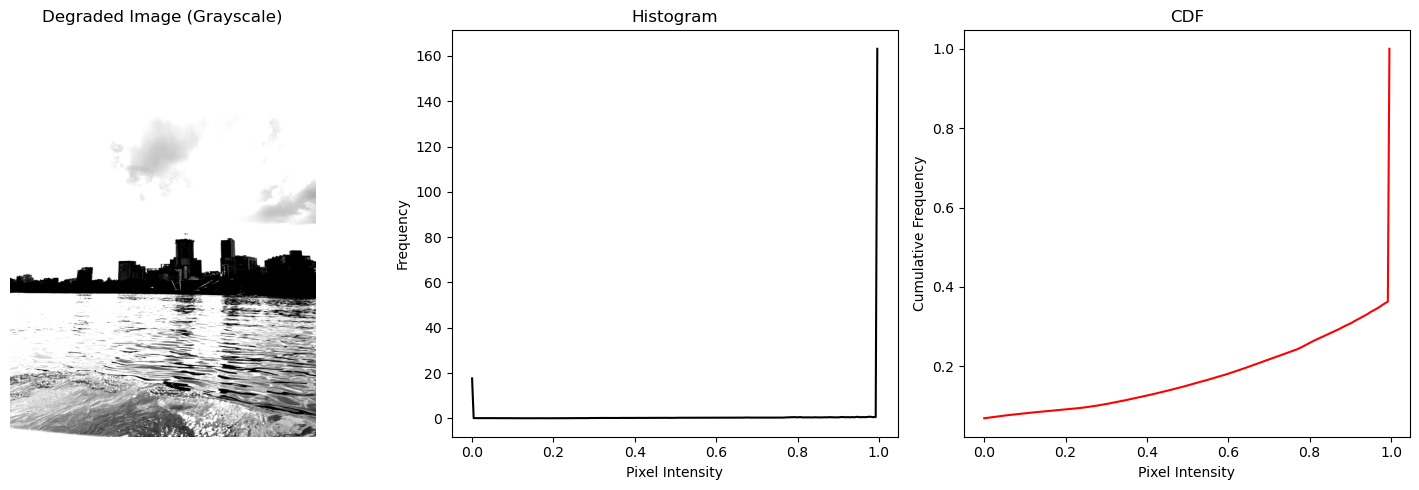

In [16]:
# Plot the Image and its histogram + cdf of the degraded image I_degraded

### BEGIN SOLUTION

def plot_degraded_image_histogram_cdf(image):
    # Ensure the image is normalized between 0 and 1
    image = img_as_float(image)
    
    # Check if the image is grayscale or color
    if len(image.shape) == 2:  # Grayscale image
        # Compute histogram and CDF
        hist, bin_edges = np.histogram(image, bins=256, range=(0, 1), density=True)
        cdf = np.cumsum(hist) * (bin_edges[1] - bin_edges[0])  # Normalize CDF
        
        # Plot the grayscale image
        plt.figure(figsize=(15, 5))
        plt.subplot(1, 3, 1)
        plt.imshow(image, cmap='gray')
        plt.title("Degraded Image (Grayscale)")
        plt.axis("off")
        
        # Plot the histogram
        plt.subplot(1, 3, 2)
        plt.plot(bin_edges[:-1], hist, color='black')
        plt.title("Histogram")
        plt.xlabel("Pixel Intensity")
        plt.ylabel("Frequency")
        
        # Plot the CDF
        plt.subplot(1, 3, 3)
        plt.plot(bin_edges[:-1], cdf, color='red')
        plt.title("CDF")
        plt.xlabel("Pixel Intensity")
        plt.ylabel("Cumulative Frequency")
        
    else:  # Color image
        # Split the image into R, G, B channels
        R, G, B = image[:, :, 0], image[:, :, 1], image[:, :, 2]
        channels = {'Red': R, 'Green': G, 'Blue': B}
        histograms = {}
        cdfs = {}
        
        for color, channel in channels.items():
            hist, bin_edges = np.histogram(channel, bins=256, range=(0, 1), density=True)
            cdf = np.cumsum(hist) * (bin_edges[1] - bin_edges[0])  # Normalize CDF
            histograms[color] = (hist, bin_edges)
            cdfs[color] = cdf
        
        # Plot the color image
        plt.figure(figsize=(15, 5))
        plt.subplot(1, 4, 1)
        plt.imshow(image)
        plt.title("Degraded Image (Color)")
        plt.axis("off")
        
        # Plot histograms and CDFs for each channel
        for i, (color, channel) in enumerate(channels.items(), start=2):
            hist, bin_edges = histograms[color]
            cdf = cdfs[color]
            
            plt.subplot(3, 4, i)
            plt.plot(bin_edges[:-1], hist, color=color.lower())
            plt.title(f"{color} Histogram")
            
            plt.subplot(3, 4, i + 4)
            plt.plot(bin_edges[:-1], cdf, color=color.lower())
            plt.title(f"{color} CDF")
    
    plt.tight_layout()
    plt.show()

# Call the function with the degraded image I_degraded
plot_degraded_image_histogram_cdf(I_degraded)

### END SOLUTION

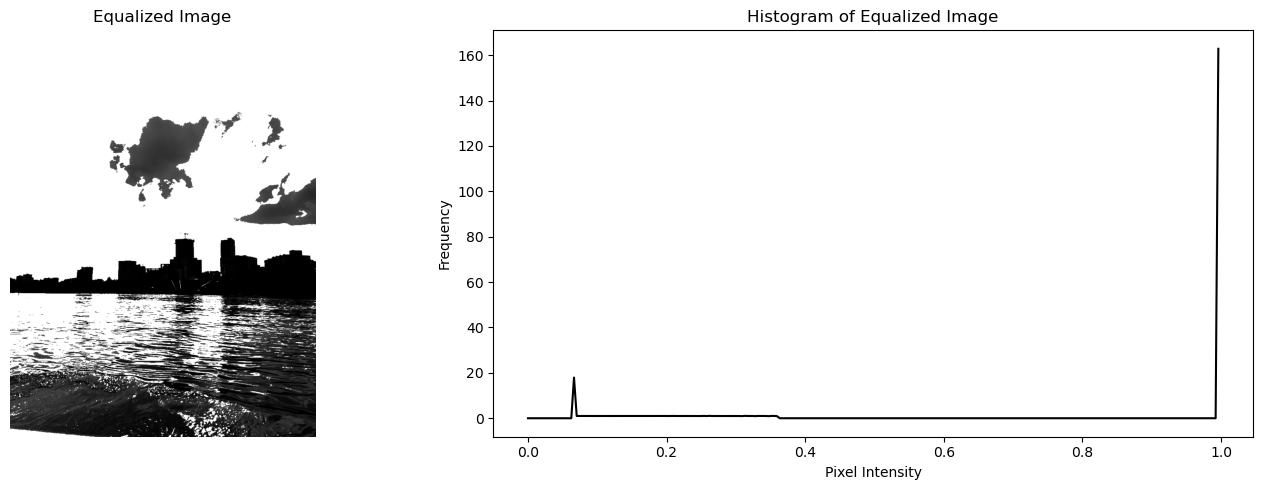

In [17]:
# Equalize the histogram of the degraded image I_degraded
# Save the result in I_recon_gray, display the image along with its histogram

### BEGIN SOLUTION

# Ensure the degraded image is normalized
I_degraded = img_as_float(I_degraded)

# Apply histogram equalization
I_recon_gray = exposure.equalize_hist(I_degraded)

# Plot the equalized image and its histogram
plt.figure(figsize=(15, 5))

# Display the equalized image
plt.subplot(1, 2, 1)
plt.imshow(I_recon_gray, cmap='gray')
plt.title("Equalized Image")
plt.axis("off")

# Compute and display the histogram of the equalized image
hist, bin_edges = np.histogram(I_recon_gray, bins=256, range=(0, 1), density=True)
plt.subplot(1, 2, 2)
plt.plot(bin_edges[:-1], hist, color='black')
plt.title("Histogram of Equalized Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

### END SOLUTION

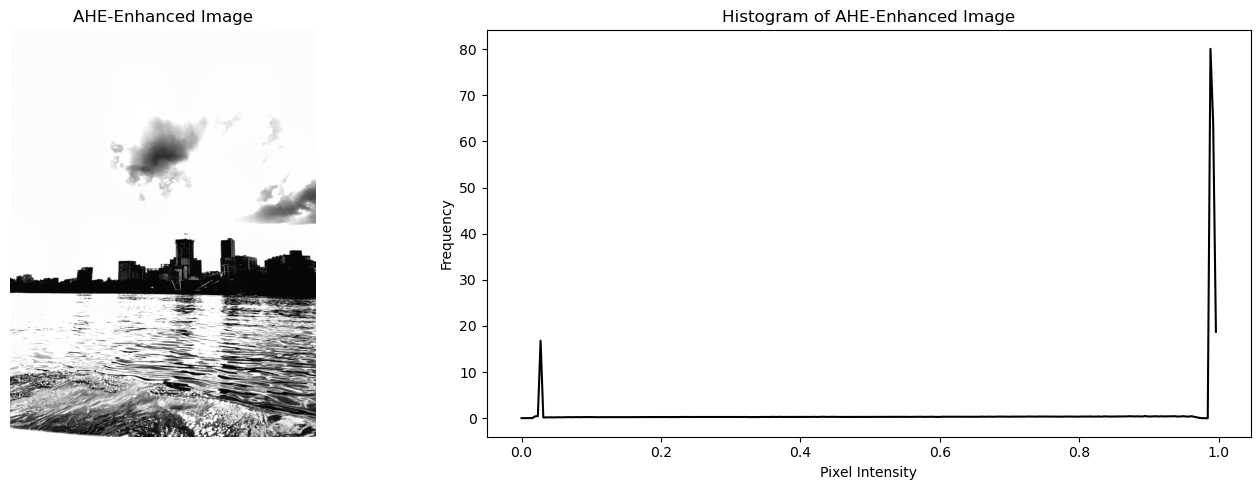

In [23]:
# Equalize the histogram of the degraded image I_degraded using AHE
# Save the result in I_recon_gray_2, display the image along with its histogram

### BEGIN SOLUTION

# Ensure the degraded image is normalized
I_degraded = img_as_float(I_degraded)

# Apply Adaptive Histogram Equalization (AHE)
I_recon_gray_2 = exposure.equalize_adapthist(I_degraded, clip_limit=0.03)

# Plot the AHE-enhanced image and its histogram
plt.figure(figsize=(15, 5))

# Display the AHE-enhanced image
plt.subplot(1, 2, 1)
plt.imshow(I_recon_gray_2, cmap='gray')
plt.title("AHE-Enhanced Image")
plt.axis("off")

# Compute and display the histogram of the AHE-enhanced image
hist, bin_edges = np.histogram(I_recon_gray_2, bins=256, range=(0, 1), density=True)
plt.subplot(1, 2, 2)
plt.plot(bin_edges[:-1], hist, color='black')
plt.title("Histogram of AHE-Enhanced Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

### END SOLUTION

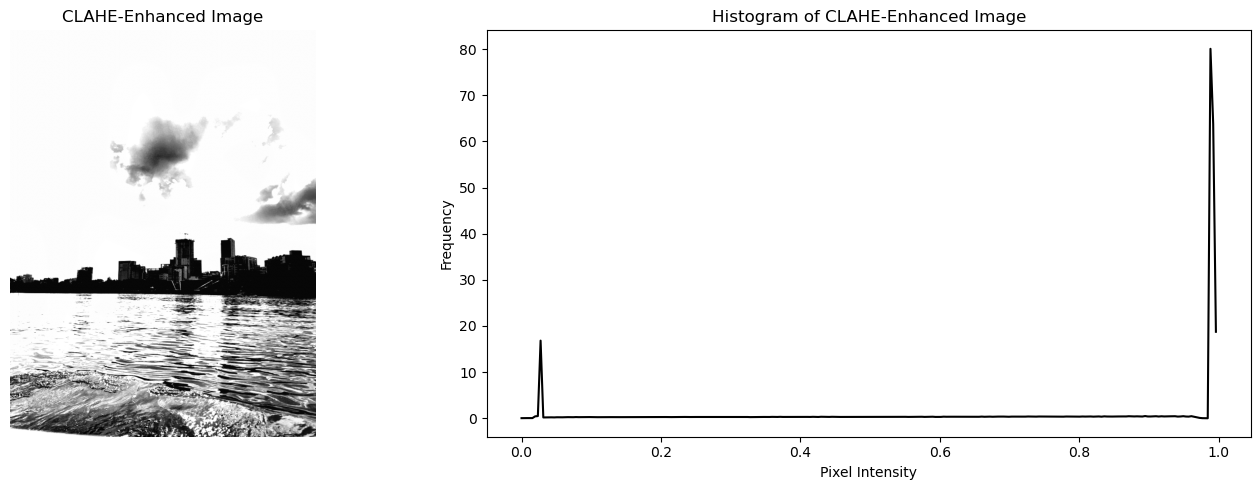

In [24]:
# Equalize the histogram of the degraded image I_degraded using CLAHE
# Save the result in I_recon_gray_3, display the image along with its histogram

### BEGIN SOLUTION

# Ensure the degraded image is normalized
I_degraded = img_as_float(I_degraded)

# Apply CLAHE (Contrast Limited Adaptive Histogram Equalization)
I_recon_gray_3 = exposure.equalize_adapthist(I_degraded, clip_limit=0.03)

# Plot the CLAHE-enhanced image and its histogram
plt.figure(figsize=(15, 5))

# Display the CLAHE-enhanced image
plt.subplot(1, 2, 1)
plt.imshow(I_recon_gray_3, cmap='gray')
plt.title("CLAHE-Enhanced Image")
plt.axis("off")

# Compute and display the histogram of the CLAHE-enhanced image
hist, bin_edges = np.histogram(I_recon_gray_3, bins=256, range=(0, 1), density=True)
plt.subplot(1, 2, 2)
plt.plot(bin_edges[:-1], hist, color='black')
plt.title("Histogram of CLAHE-Enhanced Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

### END SOLUTION

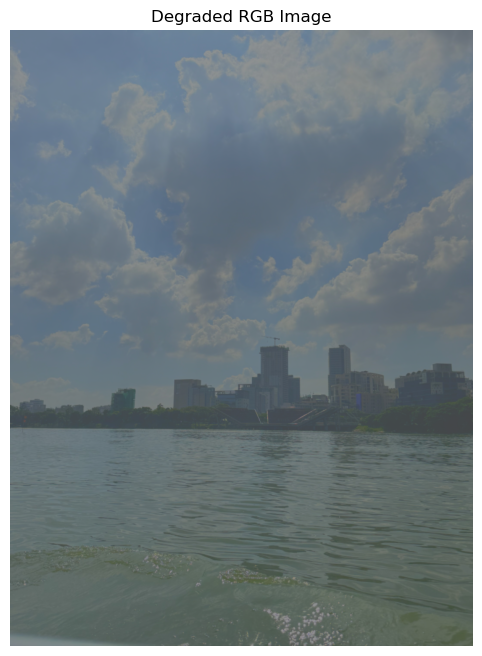

In [25]:
# Artificially degrade the original **RGB image** by reducing it contrast
# You can do so by recaling the values of the L channel (in LAB color space)
# and concentrating them in a narrow range, say between 0.3 and 0.6.
# Save the image as I_rgb_degraded and display it


### BEGIN SOLUTION

# Convert the original RGB image to LAB color space
I_lab = color.rgb2lab(I)

# Rescale the L channel to reduce contrast
L = I_lab[:, :, 0] / 100.0  # Normalize L channel to [0, 1]
L_degraded = np.interp(L, (L.min(), L.max()), (0.3, 0.6))  # Rescale to [0.3, 0.6]

# Replace the L channel with the degraded version
I_lab[:, :, 0] = L_degraded * 100.0  # Scale back to [0, 100]

# Convert the LAB image back to RGB
I_rgb_degraded = color.lab2rgb(I_lab)

# Display the degraded image
plt.figure(figsize=(8, 8))
plt.imshow(I_rgb_degraded)
plt.title("Degraded RGB Image")
plt.axis("off")
plt.show()
### END SOLUTION

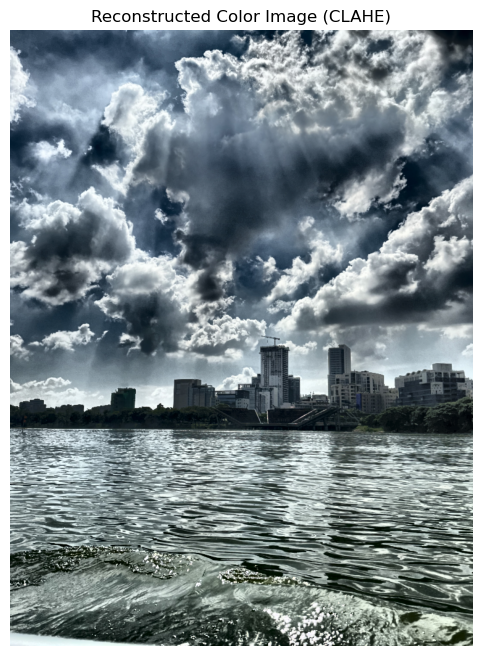

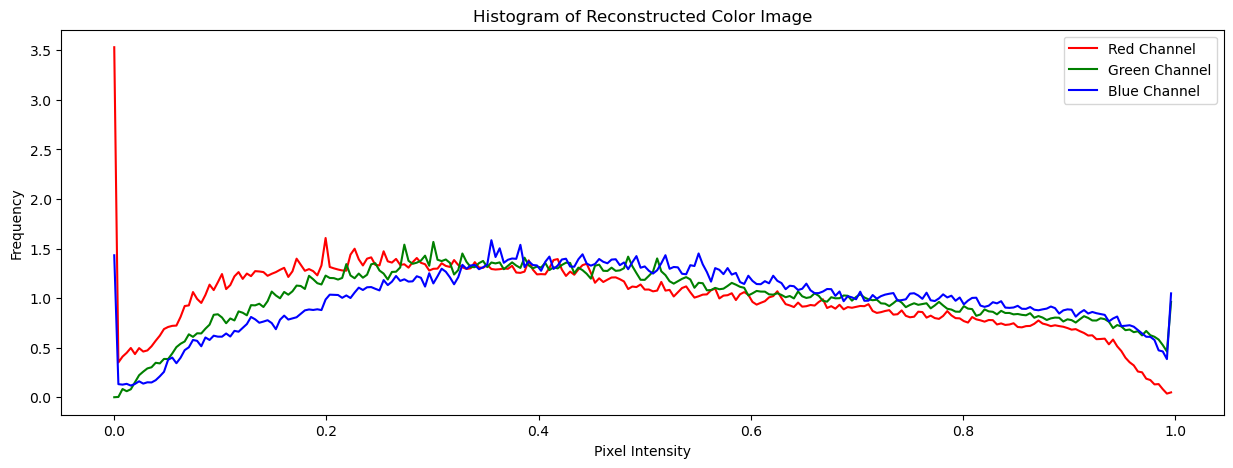

In [26]:
# Equalize the histogram of the degraded color image I_rgb_degraded using CLAHE
# Save the result in I_recon_color, display the image along with its histogram
# HINT: You have to convert to LAB first
# See the lecture and lecture-4-demo-codes


### BEGIN SOLUTION
# Convert the degraded RGB image to LAB color space
I_lab_degraded = color.rgb2lab(I_rgb_degraded)

# Extract the L channel and normalize it to [0, 1]
L = I_lab_degraded[:, :, 0] / 100.0

# Apply CLAHE to the L channel
L_equalized = exposure.equalize_adapthist(L, clip_limit=0.03)

# Replace the L channel with the equalized version
I_lab_degraded[:, :, 0] = L_equalized * 100.0  # Scale back to [0, 100]

# Convert the LAB image back to RGB
I_recon_color = color.lab2rgb(I_lab_degraded)

# Display the reconstructed color image
plt.figure(figsize=(8, 8))
plt.imshow(I_recon_color)
plt.title("Reconstructed Color Image (CLAHE)")
plt.axis("off")
plt.show()

# Compute and display the histogram of the reconstructed image
plt.figure(figsize=(15, 5))
for i, color_name in enumerate(['Red', 'Green', 'Blue']):
    channel = I_recon_color[:, :, i]
    hist, bin_edges = np.histogram(channel, bins=256, range=(0, 1), density=True)
    plt.plot(bin_edges[:-1], hist, label=f"{color_name} Channel", color=color_name.lower())
plt.title("Histogram of Reconstructed Color Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.legend()
plt.show()
### END SOLUTION

# Task 3 - Open Ended
 ## ***There are 3 images in the drive directory below. Look at the questions from the brackets [.]. Answer them in the provided text cell at the bottom.***

 ### **Link:  https://drive.google.com/drive/folders/1hDUt0OnoSdSrrbYMSGbJB1-kTpXXdzcY?usp=sharing**


In [22]:
# Dark_Room.jpg = very dark [The windows are on walls. How does the wall look like?]
# Foggy_Road.jpg = washed out/foggy [How many vehicles do you think there are?]
# Read_the_code.jpg = Dark RGB Barcode [What is hidden in the Barcode?
#                                       Make it scanable, scan it and say something about the hidden message.]

# Your task is to improve these images using
# contrast stretching, histogram equalization, AHE or CLAHE
# try different combination of parameter settings to see which produces the best result

### BEGIN SOLUTION

### END SOLUTION

### Your answers:

abc abc abc ... ...